In [1]:
print(f"Name: TAHMID IQBAL \nID: 21201701 \nAssignment: 01")


Name: TAHMID IQBAL 
ID: 21201701 
Assignment: 01


# A* Search Pseudocode
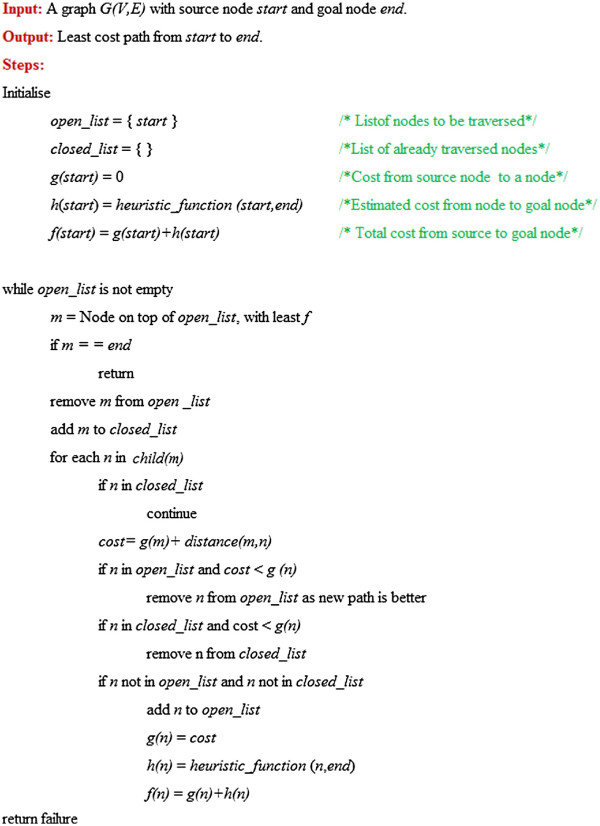


Reference: https://www.researchgate.net/publication/232085273_Determining_similarity_in_histological_images_using_graph-theoretic_description_and_matching_methods_for_content-based_image_retrieval_in_medical_diagnostics

In [ ]:

from google.colab import drive
drive.mount('/content/drive/') 


In [ ]:
import heapq # priority queue. heapq.heappop(your_queue) -> This function is used to remove and return the smallest element from the heap. The order is adjusted, so that heap structure is maintained.

In [ ]:

matrix = []
inputCode = open('/content/Input file.txt','r')   # reading input from a txt file
#print(inputCode)
codeLines = inputCode.readlines()   # read, readline, readline
#print(codeLines)
for sline in codeLines:
    matrix.append(sline.split())

['Arad 366 Zerind 75 Timisoara 118 Sibiu 140\n', 'Craiova 160 Dobreta 120 RimnicuVilcea 146 Pitesti 138\n', 'Eforie 161 Hirsova 86\n', 'Fagaras 176 Sibiu 99 Bucharest 211\n', 'Giurgiu 77 Bucharest 90\n', 'Mehadia 241 Lugoj 70 Dobreta 75\n', 'Neamt 234 lasi 87\n', 'Sibiu 253 Oradea 151 Arad 140 RimnicuVilcea 80 Fagaras 99\n', 'Oradea 380 Zerind 71 Sibiu 151\n', 'Pitesti 100 RimnicuVilcea 97 Craiova 138 Bucharest 101\n', 'RimnicuVilcea 193 Sibiu 80 Craiova 146 Pitesti 97\n', 'Dobreta 242 Mehadia 75 Craiova 120\n', 'Hirsova 151 Urziceni 98 Eforie 86\n', 'lasi 226 Vaslui 92 Neamt 87\n', 'Lugoj 244 Timisoara 111 Mehadia 70\n', 'Timisoara 329 Arad 118 Lugoj 111\n', 'Urziceni 80 Bucharest 85 Hirsova 98 Vaslui 142\n', 'Vaslui 199 Urziceni 142 lasi 92 \n', 'Zerind 374 Oradea 71 Arad 75\n', 'Bucharest 0 Fagaras 211 Pitesti 101 Giurgiu 90 Urziceni 85']


In [ ]:
# Part 1: Load and preprocess input file

input_file=open("/content/drive/MyDrive/Input file.txt",'r')
for i in input_file:
    #print(i)

# 1. Take the entire country as a dictionary
# 2. strip and split the cities into a variable
# 3. Set up a dictionary for neighbours and find them using a loop
# 4. Complete the country dictionary with corresponding heuristic values and neighbours

# Part 2: Construct the A* Function

#def A_star_Search(your_preprocessed_data, start, end):
    # Write your code


# Part 3: User Prompt, Function call, and Printing Output

#start = input("Please enter the starting point: ")
#end = input("Please enter your destination: ")

# function call - A_star_Search(your_preprocessed_data, start, end)
# Output printing

# SOLUTION


In [3]:
import heapq

def inpFunc(file_path_01):
    with open(file_path_01, 'r') as file:
        graph = {}
        h = {}
        
        for line in file:
            parts = line.split()
            city = parts[0]
            heuristic = int(parts[1])
            neighbors = parts[2:]
            
            h[city] = heuristic
            graph[city] = {}
            
            for i in range(0, len(neighbors), 2):
                neighbor = neighbors[i]
                distance = int(neighbors[i+1])
                graph[city][neighbor] = distance
                
    return graph, h

# The a_star_search function finds the shortest path from a start node to a goal node using a priority queue

def a_star_search(graph, h, start, goal):
    priority_Q = []   # Priority queue to store nodes to be explored
    heapq.heappush(priority_Q, (0 + h[start], 0, start, [start]))  
    
    visited_nodes = set()  # tracking da visited nodes
    
    while priority_Q:
        f_score, g_score, current_node, path = heapq.heappop(priority_Q)  #lowest f_score node
        
        if current_node in visited_nodes:
            continue   
        
        if current_node == goal:
            return path, g_score   
        
        visited_nodes.add(current_node)  # Marking visited
        
        for neighbor, distance in graph[current_node].items():   
            
            if neighbor in visited_nodes:
                continue  
            
            tentative_g_score = g_score + distance   
            f_score = tentative_g_score + h[neighbor]   
            
            heapq.heappush(priority_Q, (f_score, tentative_g_score, neighbor, path + [neighbor]))   
    
    return None, float('inf')   

def main():
    file_path_01 = '21201701_Tahmid_Iqbal_CSE422_06_Lab_Assignment01_InputFile_Summer2024.txt'   
    file_path_02 = 'output.txt'   
    graph, h = inpFunc(file_path_01)
    
    start = input("Start node: ")
    goal = input("Destination node: ")
    
    path, total_dist = a_star_search(graph, h, start, goal)
    
    with open(file_path_02, 'w') as output_file:
        if path:
            output_file.write(f"Path: {' -> '.join(path)}\n")
            output_file.write(f"Total distance: {total_dist} km\n")
            
            
        else:
            output_file.write("NO PATH FOUND\n")

if __name__ == "__main__":
    main()
